# Introduction: Machine Learning Project (Price Prediction for 100,000 UK Used Cars)

In this notebook, I will walk through building a UK car price prediction model from scratch.

## Dataset
* Downloaded used cars dataset containing 100,000 listings, which have been separated into files corresponding to each car manufacturer (13 csv files).

* The cleaned data set contains information of price, transmission, mileage, fuel type, road tax, miles per gallon (mpg), and engine size (in liters).


## Steps involved

1. Data cleaning
2. Exploratory data analysis
3. Feature selection
4. Comparison of several machine learning models on a performance metric
5. Hyperparameter tuning
6. Evaluate the best model on the testing set
7. Interpret the model results to the extent possible
8. Apply model to an unseen car on used cras NI

## Imports

In [6]:
!pip install datasist

import pandas as pd
import numpy as np
import seaborn as sns
import glob
import datasist as ds
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(rc={'figure.figsize': [14, 10]}, font_scale=1.2)

# Data Cleaning and Formatting

## Load in the Data and Examine

In [7]:
# Checking the names of all csv files in the data set

all_csv_files = glob.glob("archive/*.csv")
all_csv_files

['archive\\audi.csv',
 'archive\\bmw.csv',
 'archive\\cardata.csv',
 'archive\\cclass.csv',
 'archive\\focus.csv',
 'archive\\ford.csv',
 'archive\\hyundi.csv',
 'archive\\merc.csv',
 'archive\\skoda.csv',
 'archive\\toyota.csv',
 'archive\\unclean cclass.csv',
 'archive\\unclean focus.csv',
 'archive\\vauxhall.csv',
 'archive\\vw.csv']

> **I found that there is 2 uncleaned data files named (unclean cclass.csv, unclean focus.csv)  so i have to deal with them separately**

In [8]:
#check the columns in each csv

for i in all_csv_files:
    pd.read_csv(i)
    print(i)
    print('-'*10)
    print(pd.read_csv(i).columns)
    print('='*70)

archive\audi.csv
----------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
archive\bmw.csv
----------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
archive\cardata.csv
----------
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')
archive\cclass.csv
----------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
archive\focus.csv
----------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
archive\ford.csv
----------
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
archive\hyundi.csv
----------
Index(['model', '

> ### I found that:
**1) these csv files have complete columns (audi.csv, bmw.csv, ford.csv, merc.csv, skoda.csv, toyota.csv, vauxhall.csv, vw.csv).**

> #### 2) these csv files are missing tax column (cclass.csv, focus.csv)

> #### 3) these csv files are missing mpg column (cclass.csv, focus.csv)

> #### 4) hyundi.csv file have a column named tax(£) which should be tax.

> #### 5) the two unclead files have a different columns than the others, so i have to deal with both of them separately.

> #### 6) I need to add company column which contains company name for all files

In [9]:
# Making the clean files in one list

clean_csv_files = all_csv_files
clean_csv_files.remove('archive\\unclean cclass.csv')
clean_csv_files.remove('archive\\unclean focus.csv')
clean_csv_files

['archive\\audi.csv',
 'archive\\bmw.csv',
 'archive\\cardata.csv',
 'archive\\cclass.csv',
 'archive\\focus.csv',
 'archive\\ford.csv',
 'archive\\hyundi.csv',
 'archive\\merc.csv',
 'archive\\skoda.csv',
 'archive\\toyota.csv',
 'archive\\vauxhall.csv',
 'archive\\vw.csv']

In [10]:
'archive\\cclass.csv'.replace('archive\\', '').split('.')[0]

'cclass'

In [11]:
clean_dataframes=[]

for i in clean_csv_files:
    
    # Solving finding no.6 (add company column which contains company name)
    company_name= i.replace('archive\\', '').split('.')[0]
    df=pd.read_csv(i)
    df['company name'] = company_name
    
    # solving finding no.4 (column named tax(£) should be tax)
    if i == '../input/used-car-dataset-ford-and-mercedes/hyundi.csv':
        df.rename(columns={'tax(£)': 'tax'}, inplace=True)
        
    # solving finding no.2 & no.3 ( missing columns in (cclass.csv, focus.csv))    
    elif i == 'cclass.csv' or i == 'focus.csv' :
        df['tax'] = np.nan
        df['mpg'] = np.nan
        
    clean_dataframes.append(df)
    
    
    

In [12]:
# Merging all clean data in one data frame called (df_clean)

df_clean = pd.concat(clean_dataframes, axis=0, ignore_index=True)
df_clean.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_clean.shape

(108841, 20)

In [14]:
df_clean.describe()

,year,price,mileage,tax,mpg,engineSize,Year,Selling_Price,Present_Price,Kms_Driven,Owner,tax(£)
count,108540.000000,108540.000000,108540.000000,94327.000000,99187.000000,108540.000000,301.000000,301.000000,301.000000,301.000000,301.000000,4860.000000
mean,2017.098028,16890.124046,23025.928469,120.256183,55.166825,1.661644,2013.627907,4.661296,7.628472,36947.205980,0.043189,121.147119
std,2.130057,9756.266820,21176.423684,63.404805,16.138522,0.557058,2.891554,5.082812,8.644115,38886.883882,0.247915,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000,2012.000000,0.900000,1.200000,15000.000000,0.000000,125.000000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000,2014.000000,3.600000,6.400000,32000.000000,0.000000,145.000000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000,2016.000000,6.000000,9.900000,48767.000000,0.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,2018.000000,35.000000,92.600000,500000.000000,3.000000,555.000000


In [15]:
# Merging all unclean data in one data frame called (df_unclean).
# unclean files (focus.csv & unclean cclass.csv) already have the same columns.


unclean_csv_files=['archive\\unclean cclass.csv' , 'archive\\unclean focus.csv']

unclean_dataframes=[]

for i in unclean_csv_files:
    
    # Solving finding no.6 (add company column which contains company name)
    company_name= i.replace('archive\\', '').split('.')[0]
    df=pd.read_csv(i)
    df['company name'] = company_name
       
    unclean_dataframes.append(df)
    
df_unclean = pd.concat(unclean_dataframes, axis=0, ignore_index=True)   
df_unclean.head()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference,company name
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331,unclean cclass
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746,unclean cclass
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894,unclean cclass
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816,unclean cclass
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660,unclean cclass


In [16]:
df_unclean.shape

(9610, 12)

In [17]:
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         9455 non-null   object 
 1   year          9363 non-null   float64
 2   price         9455 non-null   object 
 3   transmission  9455 non-null   object 
 4   mileage       8537 non-null   object 
 5   fuel type     3517 non-null   object 
 6   engine size   9345 non-null   object 
 7   mileage2      9399 non-null   object 
 8   fuel type2    8537 non-null   object 
 9   engine size2  8537 non-null   object 
 10  reference     9455 non-null   object 
 11  company name  9610 non-null   object 
dtypes: float64(1), object(11)
memory usage: 901.1+ KB


In [18]:
for col in df_unclean.columns:
    print(col)
    print('-'*15)
    print(df_unclean[col].value_counts())
    print('='*50)

model
---------------
model
Focus      5548
C Class    3907
Name: count, dtype: int64
year
---------------
year
2019.0    3184
2017.0    1954
2018.0    1428
2016.0    1098
2015.0     714
2014.0     292
2013.0     216
2020.0     196
2012.0      68
2011.0      45
2009.0      44
2008.0      34
2010.0      30
2007.0      22
2005.0      16
2006.0       6
2002.0       5
2003.0       5
2004.0       3
1991.0       1
1995.0       1
1998.0       1
Name: count, dtype: int64
price
---------------
price
£11,000    78
£16,000    77
£12,000    68
£13,000    59
£16,998    55
           ..
£17,849     1
£30,349     1
£17,749     1
£42,099     1
£26,349     1
Name: count, Length: 3140, dtype: int64
transmission
---------------
transmission
Manual       4955
Automatic    2273
Semi-Auto    2226
Other           1
Name: count, dtype: int64
mileage
---------------
mileage
1,000     81
2,000     24
100       23
16        21
6,000     21
          ..
7,677      1
2,832      1
906        1
4,777      1
21,215  

### From the results above i found that:

#### These columns are ok  [Company name, fuel type2, model, year, transmission]

    •	1- fuel type2 should be fuel type column because it has the correct data
    •	2- should remove euro symbol from price column values
    •	3- column reference should be dropped

##### now we have 6 columns 


##### remaining cols are: [ 'mileage', ‘mileage2‘,  'tax', 'mpg', 'engineSize', 'engineSize2', ‘fuel type’]
    •	4- 'engineSize2' is ok but it have some values in cc instead of liter so it should be converted as 1 liter = 1000 cc, and    cc symbol should be removed, and this column should be the 'engineSize' column.
    •	5- Get mileage from taking the biggest value of mileage&mileage2 columns.
    	

    •	 Until this stage the remaining columnss are: ['tax',  'mpg']
    •	6- Note that in df_clean the range of tax column was from 0 to 580 and the mean was 120, so I choose the engine size column in df_unclean to be tax column in df_unclean because the data in it fits to be tax.
    •	7- fuel type column should be dropped
    •   8- creating mpg column 


In [19]:
# 3- Dropping reference column
df_unclean.drop('reference',axis=1, inplace=True)

In [20]:
# 2- Clean price column 
df_unclean['price'] = [str(i).replace(",", "").strip() for i in df_unclean['price']]
df_unclean['price'] = [float(str(i).replace("£", "").strip()) for i in df_unclean['price']]

In [21]:
df_unclean['price'].unique()

array([30495., 29989., 37899., ...,  2400.,  6288.,  6494.])

In [22]:
# 6- making engine size column as tax column and clean it

df_unclean.rename(columns={'engine size': 'tax'}, inplace=True)
df_unclean['tax'] = [str(i).replace("£", "").strip() for i in df_unclean['tax']]
df_unclean['tax'] = [str(i).lower().replace("cc", "").strip() for i in df_unclean['tax']]
df_unclean['tax'] = [str(i).replace(",", "").strip() for i in df_unclean['tax']]
df_unclean['tax'] = [float(str(i).strip()) for i in df_unclean['tax']]
df_unclean['tax']

0       2.0
1       1.5
2       2.0
3       2.0
4       2.0
       ... 
9605    2.0
9606    1.0
9607    1.0
9608    1.0
9609    1.0
Name: tax, Length: 9610, dtype: float64

In [23]:
# 7- fuel type column should be dropped
df_unclean.drop('fuel type', axis=1, inplace = True)

In [24]:
# 8- creating mpg column 
df_unclean['mpg']= np.nan

In [25]:
# 1- fuel type2 should be fuel type column
df_unclean.rename(columns={'fuel type2' : 'fuelType'}, inplace= True)
df_unclean['fuelType'].unique()

array([nan, 'Petrol', 'Diesel', 'Hybrid', 'Other'], dtype=object)

In [26]:
# 4- renaming 'engineSize2' column and clean it

df_unclean.rename(columns={'engine size2' : 'engineSize'}, inplace= True)

In [27]:
df_unclean

,model,year,price,transmission,mileage,tax,mileage2,fuelType,engineSize,company name,mpg
0,C Class,2020.0,30495.0,Automatic,NaN,2.0,"1,200",NaN,NaN,unclean cclass,NaN
1,C Class,2020.0,29989.0,Automatic,NaN,1.5,"1,000",NaN,NaN,unclean cclass,NaN
2,C Class,2020.0,37899.0,Automatic,NaN,2.0,500,NaN,NaN,unclean cclass,NaN
3,C Class,2019.0,30399.0,Automatic,NaN,2.0,"5,000",NaN,NaN,unclean cclass,NaN
4,C Class,2019.0,29899.0,Automatic,NaN,2.0,"4,500",NaN,NaN,unclean cclass,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9605,Focus,2019.0,18745.0,Manual,NaN,2.0,"7,855",NaN,NaN,unclean focus,NaN
9606,Focus,2019.0,16350.0,Manual,NaN,1.0,"13,891",NaN,NaN,unclean focus,NaN
9607,Focus,2019.0,16850.0,Manual,NaN,1.0,"13,452",NaN,NaN,unclean focus,NaN
9608,Focus,2019.0,17310.0,Automatic,NaN,1.0,"13,376",NaN,NaN,unclean focus,NaN


In [28]:
df_unclean['engineSize'].unique()

array([nan, '1.6', '2.1', '2143', '2', '4', '1991', '1600', '1595',
       '2000', '6.2', '1.5', '2145', '1950', '1796', '3982', '3', '1598',
       '2996', '2100', '1597', '1.8', '1497', '1.991', '0', '2148',
       '2.14', '2.143', '3498', '3000', '2.7', '2685', '2.2', 'Unknown',
       '2.996', '2962', '1998', '1461', '3606', '4000', '1.598', '2497',
       '2987', '1.497', '1500', '2.15', '5439', '2597', '1800', '6208',
       '0.999', '1.499', '1.596', '1.997', '1', '1000', '1.498', '1.56',
       '1999', '2.3', '1596', '1798', '999', '1560', '1498', '998',
       '1997', '1499', '1560 cc', '1988', '2521', '2261', '2300', '0.998',
       '1496', '1753', '1989', '2.5', '1596 cc', '2.29', '2.521', '1388',
       '1.0T'], dtype=object)

In [29]:
#clean engineSize column

df_unclean['engineSize'] = [str(i).replace('cc','').strip()  for i in df_unclean['engineSize']]
df_unclean['engineSize'] = [str(i).replace('T','').strip()  for i in df_unclean['engineSize']]
df_unclean['engineSize'] = [str(i).replace('Unknown','').strip()   for i in df_unclean['engineSize']]
df_unclean['engineSize'] = pd.to_numeric(df_unclean['engineSize'], errors='coerce')

# converting cc(cubic centimeters) to liters (1 liter = 1000 cc)
df_unclean['engineSize'] = df_unclean.apply(lambda x: x['engineSize']/1000 if x['engineSize']> 20 else x['engineSize'] , axis=1)


In [30]:
df_unclean['engineSize'].unique()

array([  nan, 1.6  , 2.1  , 2.143, 2.   , 4.   , 1.991, 1.595, 6.2  ,
       1.5  , 2.145, 1.95 , 1.796, 3.982, 3.   , 1.598, 2.996, 1.597,
       1.8  , 1.497, 0.   , 2.148, 2.14 , 3.498, 2.7  , 2.685, 2.2  ,
       2.962, 1.998, 1.461, 3.606, 2.497, 2.987, 2.15 , 5.439, 2.597,
       6.208, 0.999, 1.499, 1.596, 1.997, 1.   , 1.498, 1.56 , 1.999,
       2.3  , 1.798, 0.998, 1.988, 2.521, 2.261, 1.496, 1.753, 1.989,
       2.5  , 2.29 , 1.388])

In [31]:
#clean milage columns
mileage=['mileage','mileage2']
for i in mileage:
    df_unclean[i] = [str(i).split('.')[0] for i in df_unclean[i]]
    df_unclean[i] = [str(i).replace(',', '') for i in df_unclean[i]]
    df_unclean[i] = [str(i).replace('Unknown', '') for i in df_unclean[i]]
    df_unclean[i]=df_unclean[i].replace('nan', '')
    df_unclean[i] = pd.to_numeric(df_unclean[i])

In [32]:
# 5- Get mileage by taking the biggest value of mileage&mileage2 columns

df_unclean["mileage"] = df_unclean.apply(lambda x: x["mileage"] if x["mileage"]!= np.nan and x["mileage"]>x["mileage2"] else x["mileage2"], axis=1)

In [33]:
#drop old column
df_unclean.drop(["mileage2"], inplace=True, axis=1)

In [34]:
df_unclean

,model,year,price,transmission,mileage,tax,fuelType,engineSize,company name,mpg
0,C Class,2020.0,30495.0,Automatic,1200.0,2.0,NaN,NaN,unclean cclass,NaN
1,C Class,2020.0,29989.0,Automatic,1000.0,1.5,NaN,NaN,unclean cclass,NaN
2,C Class,2020.0,37899.0,Automatic,500.0,2.0,NaN,NaN,unclean cclass,NaN
3,C Class,2019.0,30399.0,Automatic,5000.0,2.0,NaN,NaN,unclean cclass,NaN
4,C Class,2019.0,29899.0,Automatic,4500.0,2.0,NaN,NaN,unclean cclass,NaN
...,...,...,...,...,...,...,...,...,...,...
9605,Focus,2019.0,18745.0,Manual,7855.0,2.0,NaN,NaN,unclean focus,NaN
9606,Focus,2019.0,16350.0,Manual,13891.0,1.0,NaN,NaN,unclean focus,NaN
9607,Focus,2019.0,16850.0,Manual,13452.0,1.0,NaN,NaN,unclean focus,NaN
9608,Focus,2019.0,17310.0,Automatic,13376.0,1.0,NaN,NaN,unclean focus,NaN


In [35]:
df_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9610 entries, 0 to 9609
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         9455 non-null   object 
 1   year          9363 non-null   float64
 2   price         9455 non-null   float64
 3   transmission  9455 non-null   object 
 4   mileage       9398 non-null   float64
 5   tax           9345 non-null   float64
 6   fuelType      8537 non-null   object 
 7   engineSize    8531 non-null   float64
 8   company name  9610 non-null   object 
 9   mpg           0 non-null      float64
dtypes: float64(6), object(4)
memory usage: 750.9+ KB


In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108841 entries, 0 to 108840
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   model          108540 non-null  object 
 1   year           108540 non-null  float64
 2   price          108540 non-null  float64
 3   transmission   108540 non-null  object 
 4   mileage        108540 non-null  float64
 5   fuelType       108540 non-null  object 
 6   tax            94327 non-null   float64
 7   mpg            99187 non-null   float64
 8   engineSize     108540 non-null  float64
 9   company name   108841 non-null  object 
 10  Car_Name       301 non-null     object 
 11  Year           301 non-null     float64
 12  Selling_Price  301 non-null     float64
 13  Present_Price  301 non-null     float64
 14  Kms_Driven     301 non-null     float64
 15  Fuel_Type      301 non-null     object 
 16  Seller_Type    301 non-null     object 
 17  Transmission   301 non-null  

> **Now df_clean and df_unclean have the same column names and data types**

In [37]:
# Concatenating DataFrames
df = pd.concat([df_clean, df_unclean], axis=0, ignore_index=True)  
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.shape

(118451, 20)

In [39]:
df.year.unique()

array([2017., 2016., 2019., 2015., 2014., 2018., 2013., 2020., 2004.,
       2009., 2012., 2010., 2007., 2011., 2008., 2003., 2005., 2002.,
       2006., 1998., 1997., 2001., 2000., 1999., 1996.,   nan, 1991.,
       1995., 2060., 1970.])

## Missing Values

In [40]:
df.isnull().sum()

model               456
year                548
price               456
transmission        456
mileage             513
fuelType           1374
tax               14779
mpg               19264
engineSize         1380
company name          0
Car_Name         118150
Year             118150
Selling_Price    118150
Present_Price    118150
Kms_Driven       118150
Fuel_Type        118150
Seller_Type      118150
Transmission     118150
Owner            118150
tax(£)           113591
dtype: int64

In [41]:
df.fillna({'mileage':df['mileage'].mean()}, inplace = True)
df.fillna({'tax':df['tax'].mean()}, inplace = True)
df.fillna({'mpg':df['mpg'].mean()}, inplace = True)
df.fillna({'model':df['model'].mode()}, inplace = True)
df.fillna({'transmission':df['transmission'].mode()}, inplace = True)
df.fillna({'fuelType':df['fuelType'].mode()}, inplace = True)
df.fillna({'year':df['year'].mode()}, inplace = True)

In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()

df['price'] = imputer.fit_transform(df[['price']])
df['engineSize'] = imputer.fit_transform(df[['engineSize']])

In [43]:
df.isnull().sum()

model               456
year                548
price                 0
transmission        456
mileage               0
fuelType           1374
tax                   0
mpg                   0
engineSize            0
company name          0
Car_Name         118150
Year             118150
Selling_Price    118150
Present_Price    118150
Kms_Driven       118150
Fuel_Type        118150
Seller_Type      118150
Transmission     118150
Owner            118150
tax(£)           113591
dtype: int64

# Exploratory Data Analysis  (EDA)

## Data cleaning

In [44]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,Year,Selling_Price,Present_Price,Kms_Driven,Owner,tax(£)
count,117903.000000,118451.000000,118451.000000,118451.000000,118451.000000,118451.000000,301.000000,301.000000,301.000000,301.000000,301.000000,4860.000000
mean,2017.106452,16960.046561,22967.101460,119.909636,55.166825,1.661791,2013.627907,4.661296,7.628472,36947.205980,0.043189,121.147119
std,2.135852,9641.229575,21101.425523,75.432609,14.767991,0.553431,2.891554,5.082812,8.644115,38886.883882,0.247915,58.003289
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000
25%,2016.000000,10399.000000,7555.000000,119.909636,47.900000,1.200000,2012.000000,0.900000,1.200000,15000.000000,0.000000,125.000000
50%,2017.000000,14990.000000,17185.000000,145.000000,55.166825,1.600000,2014.000000,3.600000,6.400000,32000.000000,0.000000,145.000000
75%,2019.000000,20932.500000,32025.500000,145.000000,60.100000,2.000000,2016.000000,6.000000,9.900000,48767.000000,0.000000,145.000000
max,2060.000000,159999.000000,323000.000000,5400.000000,470.800000,6.600000,2018.000000,35.000000,92.600000,500000.000000,3.000000,555.000000


In [45]:
df[df['year']==2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)
48829,Fiesta,2060.0,6495.0,Automatic,54807.0,Petrol,205.0,42.8,1.4,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df = df.drop(labels=48528, axis=0)

<Axes: >

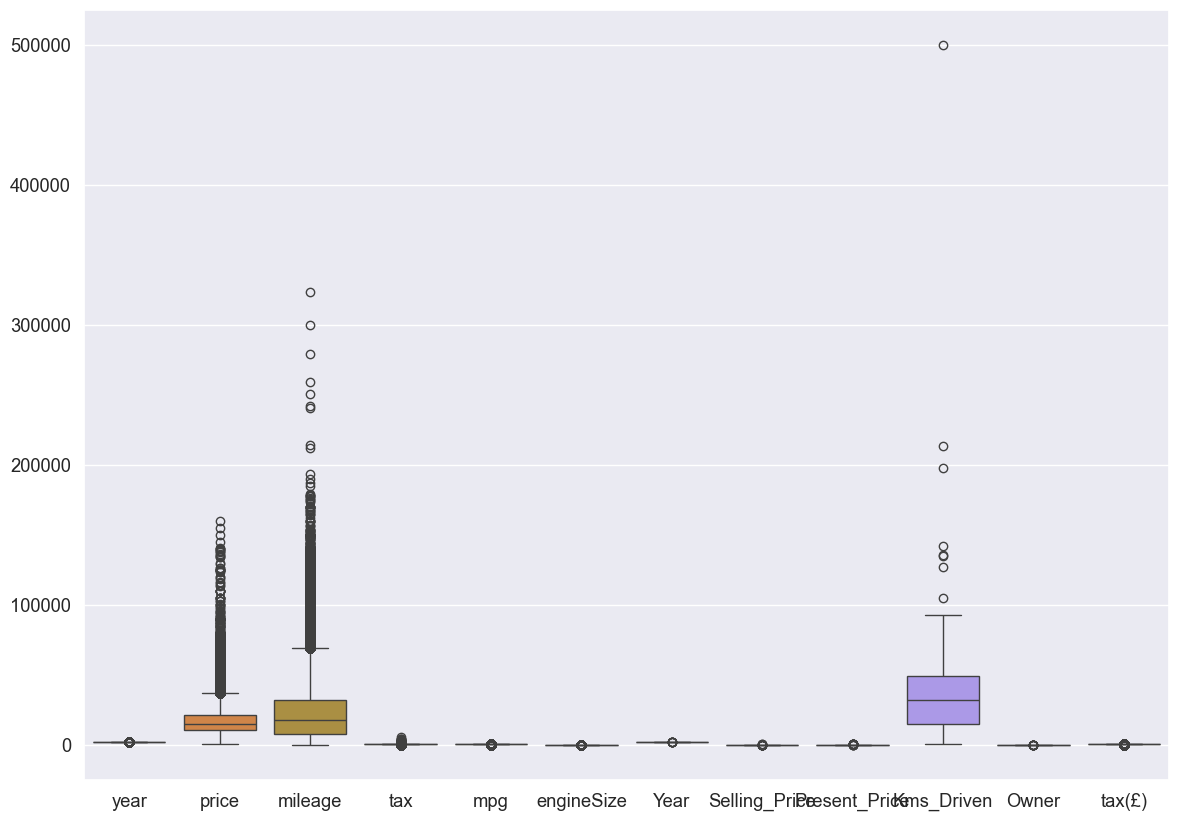

In [47]:
sns.boxplot(data=df)

<Axes: xlabel='mileage'>

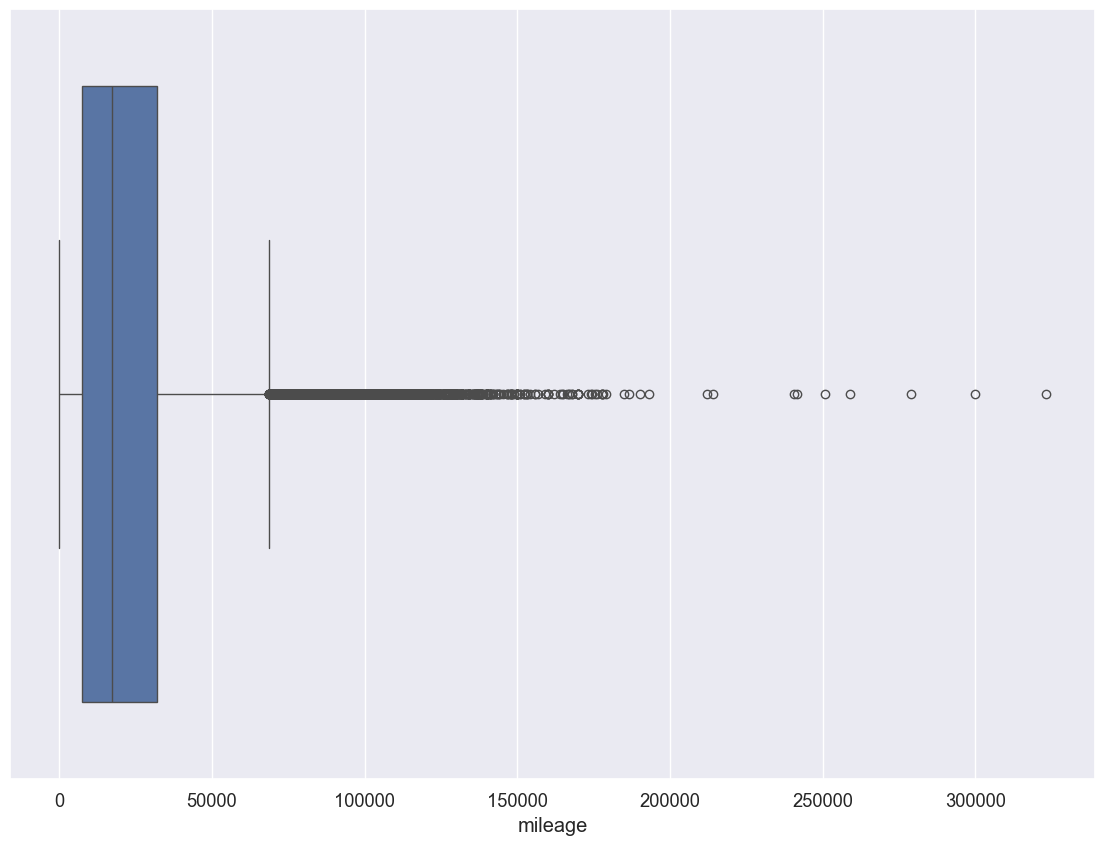

In [48]:
sns.boxplot(data=df, x='mileage')

In [49]:
# Detect all outliers

from datasist.structdata import detect_outliers
out_idx = detect_outliers(df, 0, ['price', 'mileage'])

len(out_idx)

9316

In [50]:
# Drop outliers
df.drop(index = out_idx, inplace=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)
0,A1,2017.0,12500.0,Manual,15735.0,Petrol,150.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A6,2016.0,16500.0,Automatic,36203.0,Diesel,20.0,64.2,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A1,2016.0,11000.0,Manual,29946.0,Petrol,30.0,55.4,1.4,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A4,2017.0,16800.0,Automatic,25952.0,Diesel,145.0,67.3,2.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A3,2019.0,17300.0,Manual,1998.0,Petrol,145.0,49.6,1.0,audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#there is a space in front of each model name.
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' A8', ' RS4', ' RS3', ' RS5', ' SQ5', ' S8',
       ' S3', ' R8', ' S5', ' RS7', ' 5 Series', ' 6 Series', ' 1 Series',
       ' 7 Series', ' 2 Series', ' 4 Series', ' X3', ' 3 Series', ' X4',
       ' i3', ' X1', ' M4', ' X2', ' X6', ' X5', ' Z4', ' M2', ' M6',
       ' M3', ' M5', ' Z3', nan, ' C Class', ' Focus', ' Fiesta', ' Puma',
       ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+',
       ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect',
       ' Grand C-MAX', ' KA', ' Galaxy', ' Grand Tourneo Connect',
       ' Mustang', ' Fusion', ' Streetka', ' Escort', ' Transit Tourneo',
       ' I20', ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq',
       ' Kona', ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent',
       ' Getz', ' Amica', ' SLK', ' S Class', ' GLE Class', ' GLA Class',
       ' A Class', ' B Class', ' E Class', ' GL Class', ' SL CLASS',
      

In [52]:
#cleaning the model names
df['model'] = [i.strip()   for i in df['model']]

AttributeError: 'float' object has no attribute 'strip'

In [53]:
df['model'].unique()[:10]

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7'], dtype=object)

In [54]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', nan, 'Other'], dtype=object)

In [55]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric', nan],
      dtype=object)

In [56]:
df['company name'].unique()

array(['audi', 'bmw', 'cardata', 'cclass', 'focus', 'ford', 'hyundi',
       'merc', 'skoda', 'toyota', 'vauxhall', 'vw', 'unclean cclass',
       'unclean focus'], dtype=object)

In [57]:
df['year'].unique()

array([2017., 2016., 2019., 2015., 2014., 2018., 2013., 2020., 2012.,
       2010., 2011., 2004., 2008., 2009., 1998., 2003., 2005., 2007.,
       2006., 2001., 2002., 1999., 1996., 1997.,   nan, 2000., 2060.,
       1970., 1991., 1995.])

In [58]:
# converting year column to the suitable data type 'integer'
df['year'] = df['year'].convert_dtypes() 

In [59]:
df['year'].dtype

Int64Dtype()

# Visualization

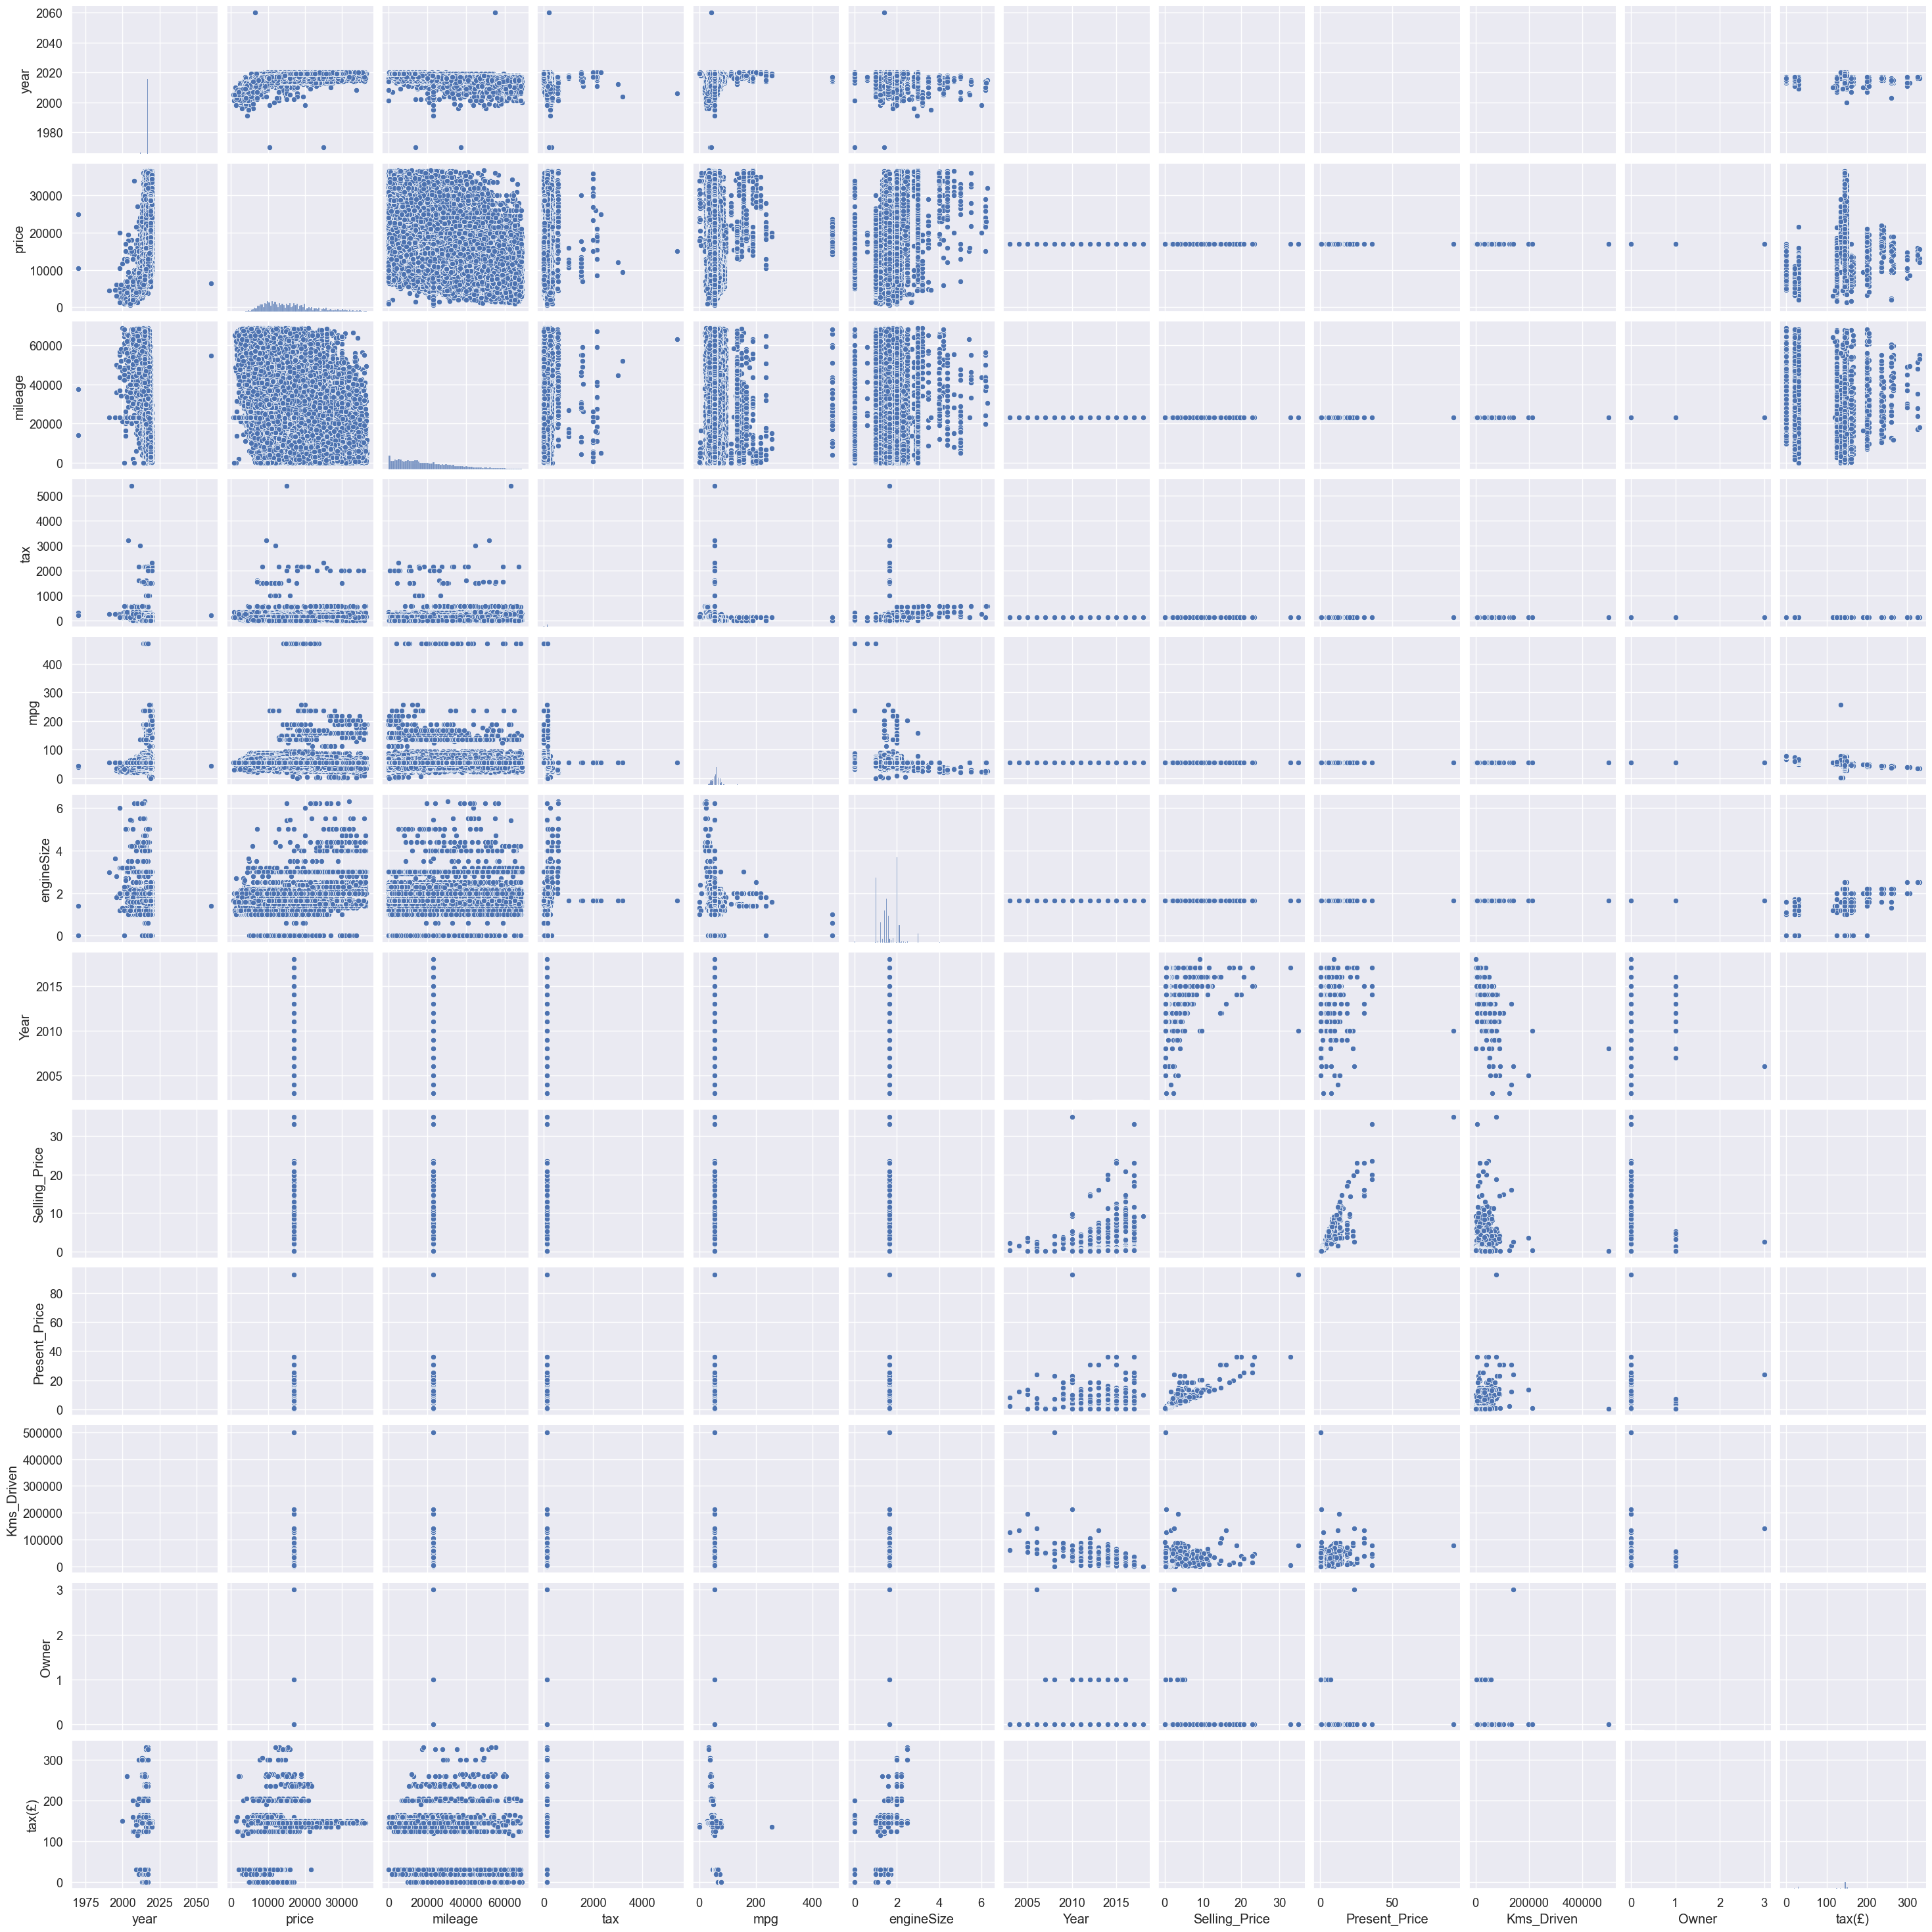

In [60]:
sns.pairplot(df)

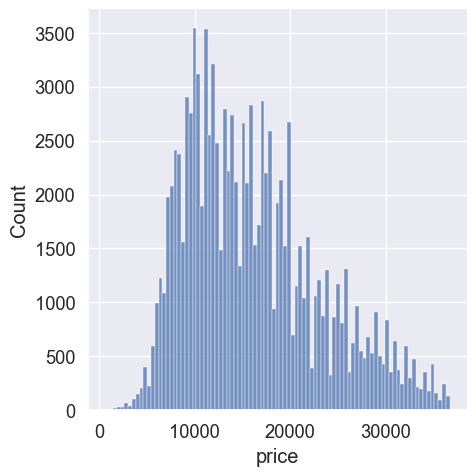

In [61]:
sns.displot(data=df,  x='price')

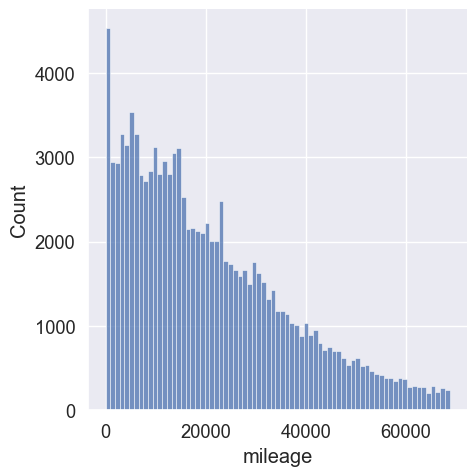

In [62]:
sns.displot(data=df,  x='mileage')

C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\268308135.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


[Text(0, 0, '1970'),
 Text(1, 0, '1991'),
 Text(2, 0, '1995'),
 Text(3, 0, '1996'),
 Text(4, 0, '1997'),
 Text(5, 0, '1998'),
 Text(6, 0, '1999'),
 Text(7, 0, '2000'),
 Text(8, 0, '2001'),
 Text(9, 0, '2002'),
 Text(10, 0, '2003'),
 Text(11, 0, '2004'),
 Text(12, 0, '2005'),
 Text(13, 0, '2006'),
 Text(14, 0, '2007'),
 Text(15, 0, '2008'),
 Text(16, 0, '2009'),
 Text(17, 0, '2010'),
 Text(18, 0, '2011'),
 Text(19, 0, '2012'),
 Text(20, 0, '2013'),
 Text(21, 0, '2014'),
 Text(22, 0, '2015'),
 Text(23, 0, '2016'),
 Text(24, 0, '2017'),
 Text(25, 0, '2018'),
 Text(26, 0, '2019'),
 Text(27, 0, '2020'),
 Text(28, 0, '2060')]

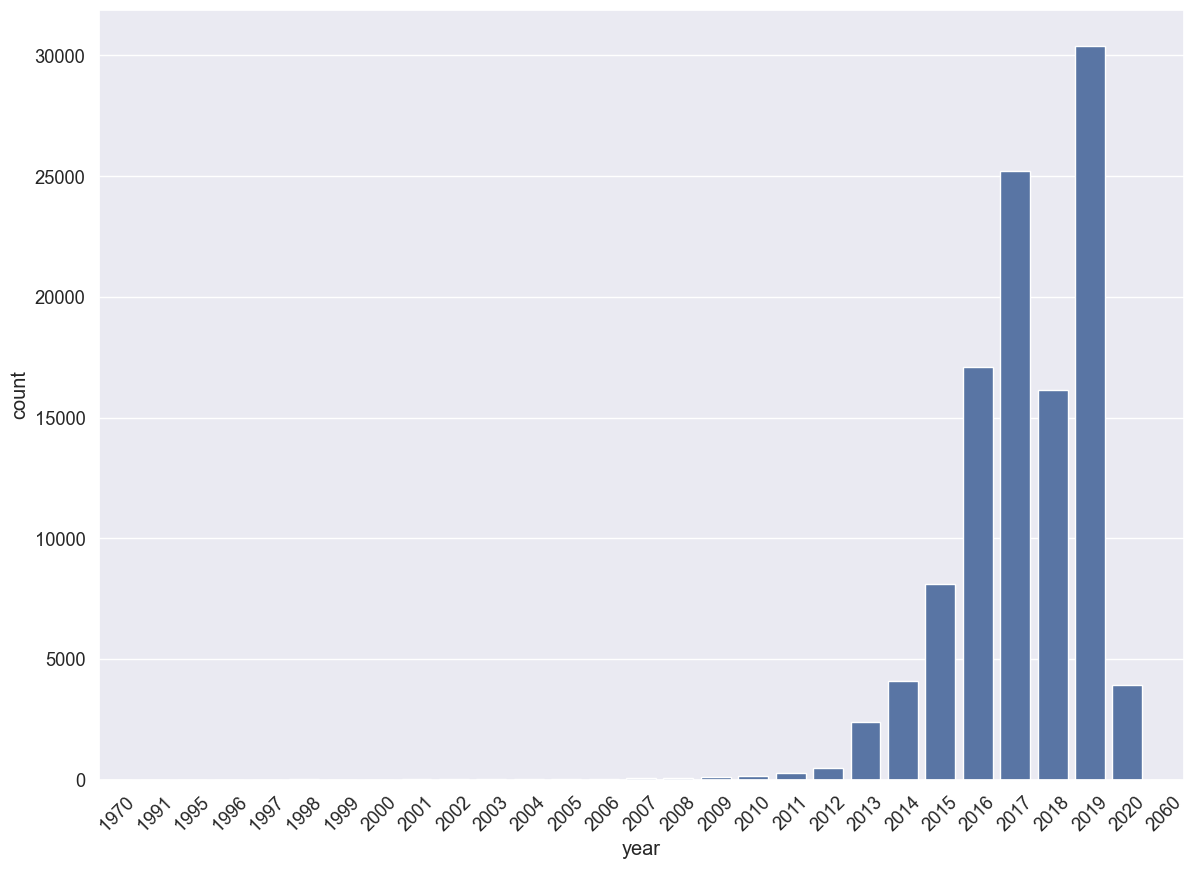

In [63]:
ax=sns.countplot(data=df, x='year')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)

<Axes: xlabel='company name', ylabel='count'>

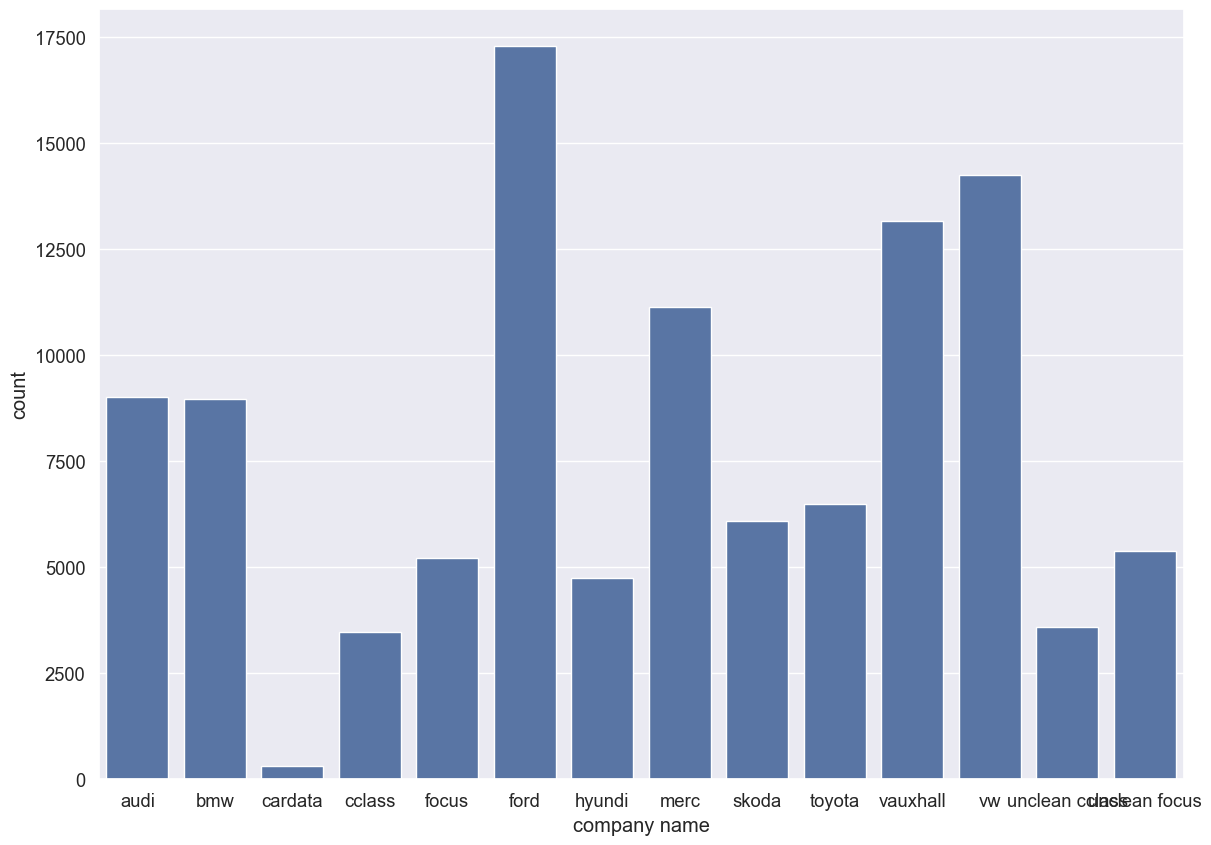

In [64]:
sns.countplot(data=df, x='company name')

<Axes: xlabel='fuelType', ylabel='count'>

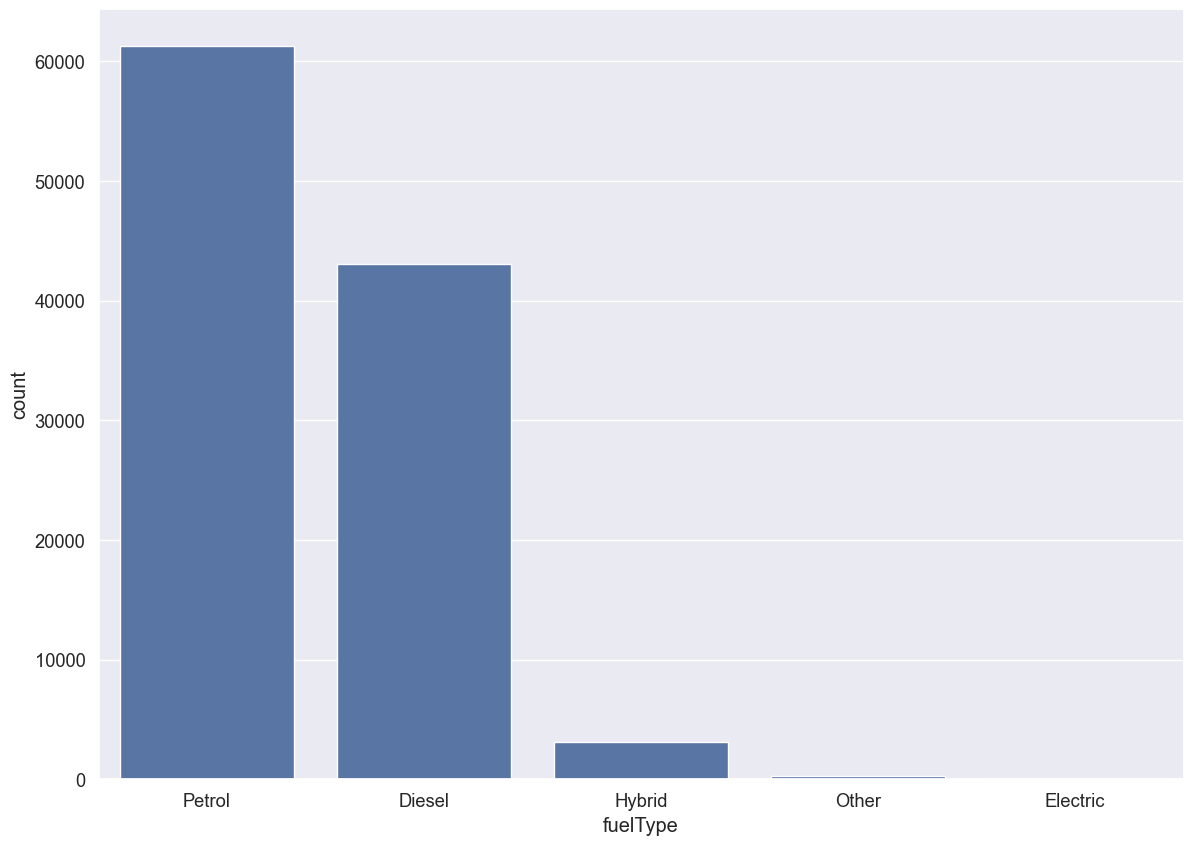

In [65]:
sns.countplot(data=df, x='fuelType')

<Axes: xlabel='fuelType', ylabel='count'>

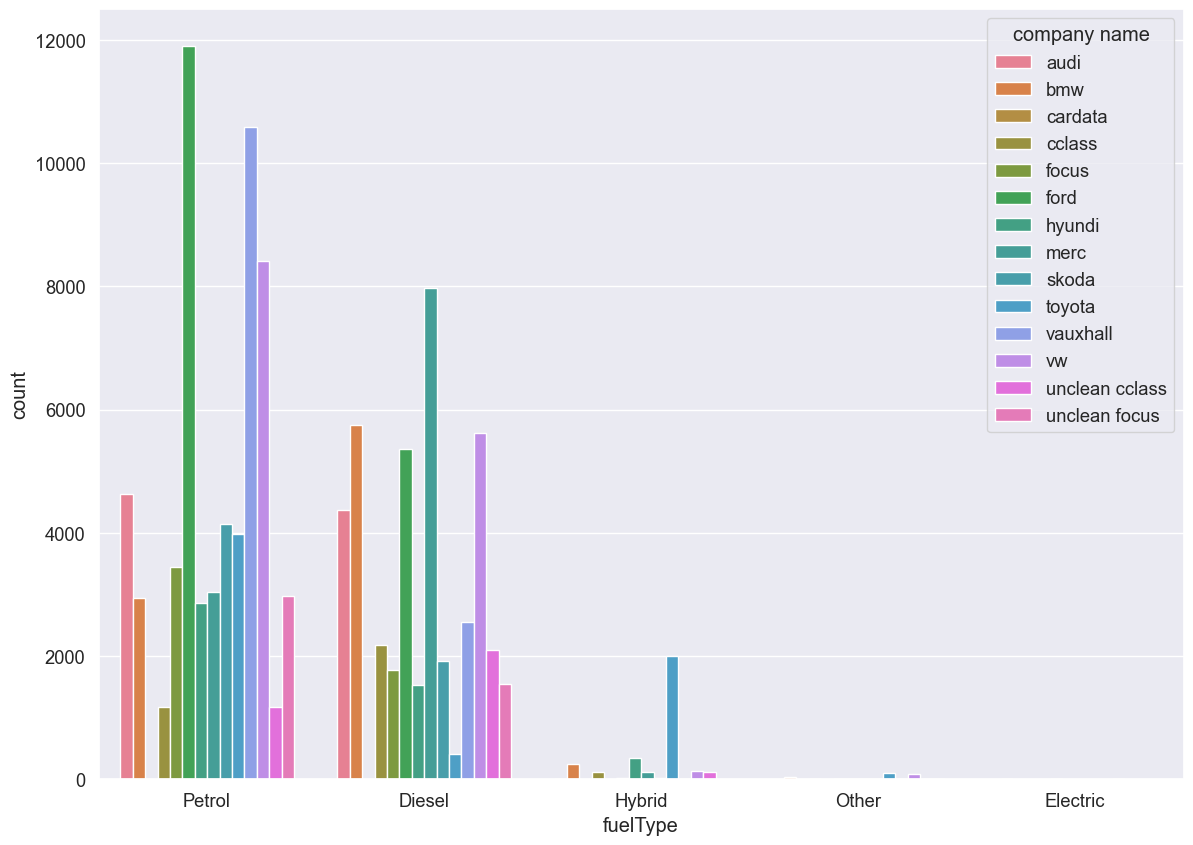

In [66]:
sns.countplot(data=df, x='fuelType', hue='company name')

<Axes: xlabel='fuelType', ylabel='count'>

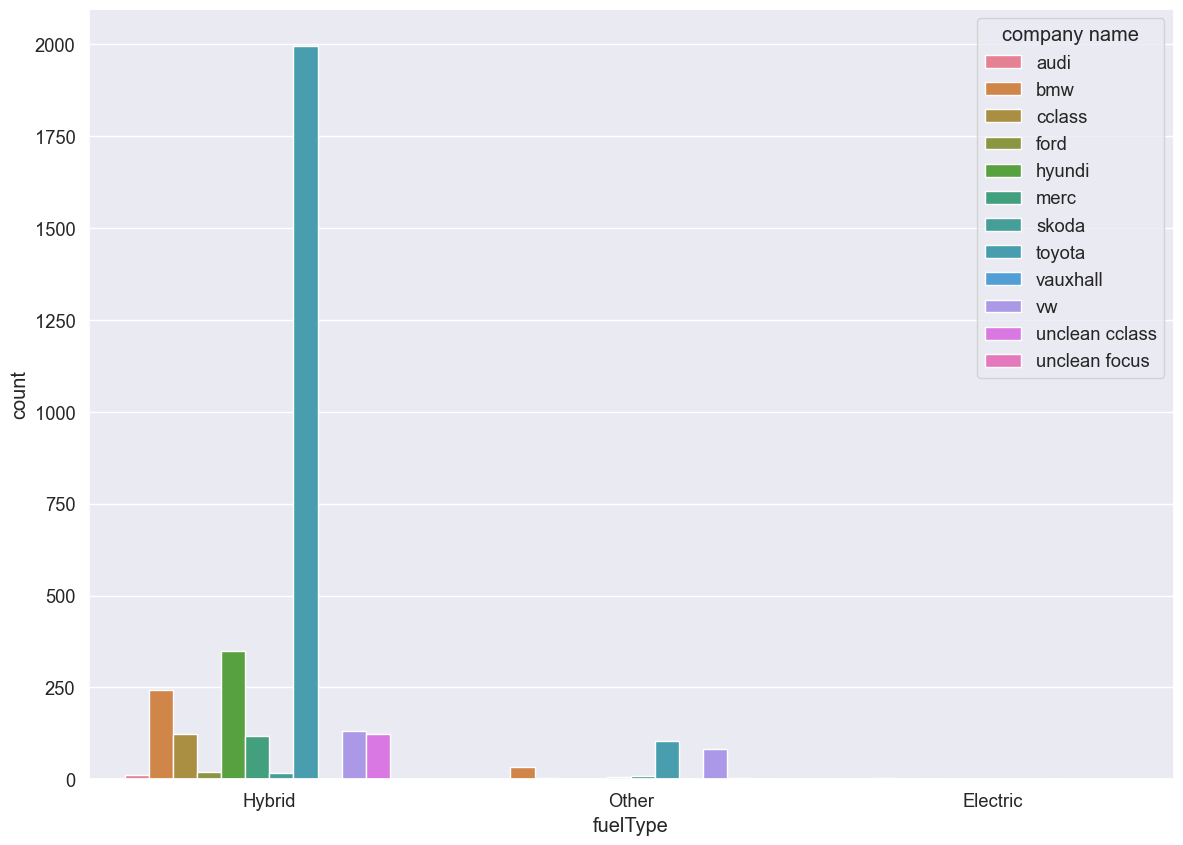

In [67]:
HEO=['Other','Hybrid', 'Electric']
sns.countplot(data=df.loc[df['fuelType'].isin(HEO)], x='fuelType', hue='company name')


<Axes: xlabel='fuelType', ylabel='count'>

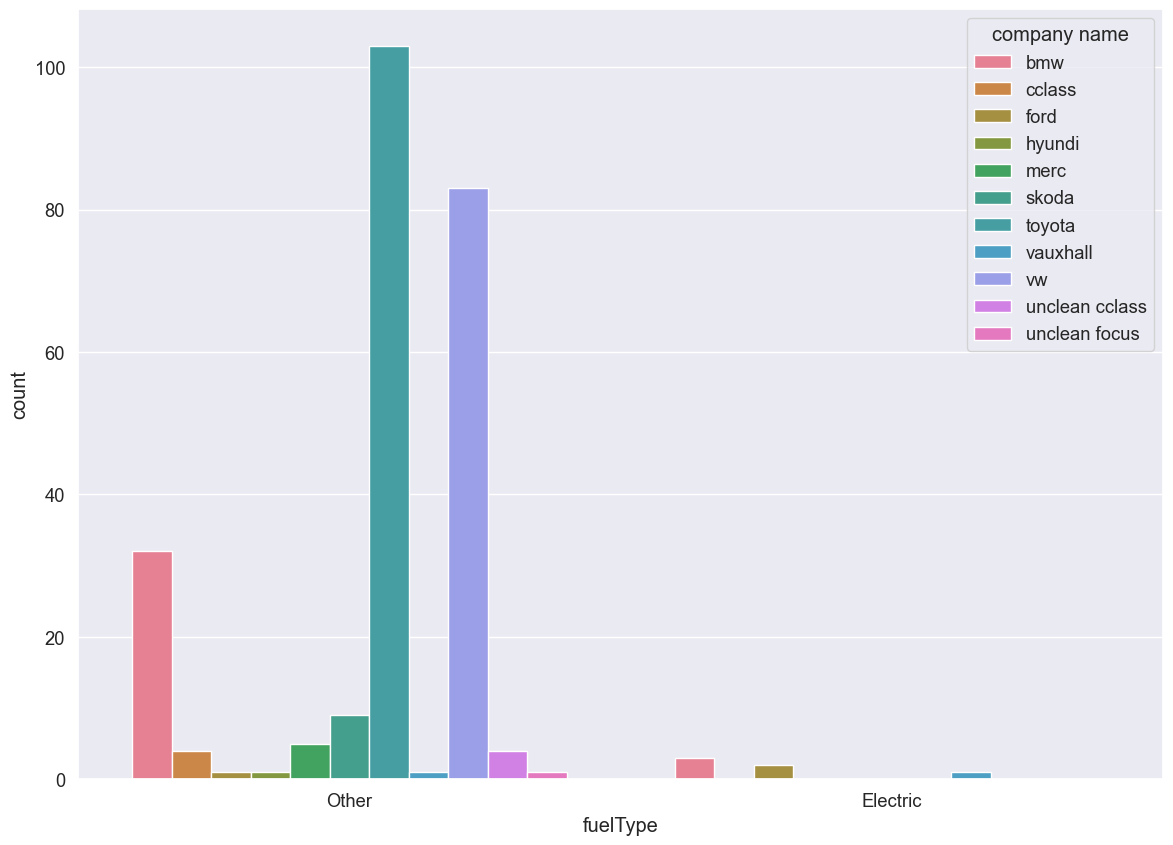

In [68]:
EO=['Other', 'Electric']
sns.countplot(data=df.loc[df['fuelType'].isin(EO)], x='fuelType', hue='company name')


<Axes: xlabel='company name', ylabel='mpg'>

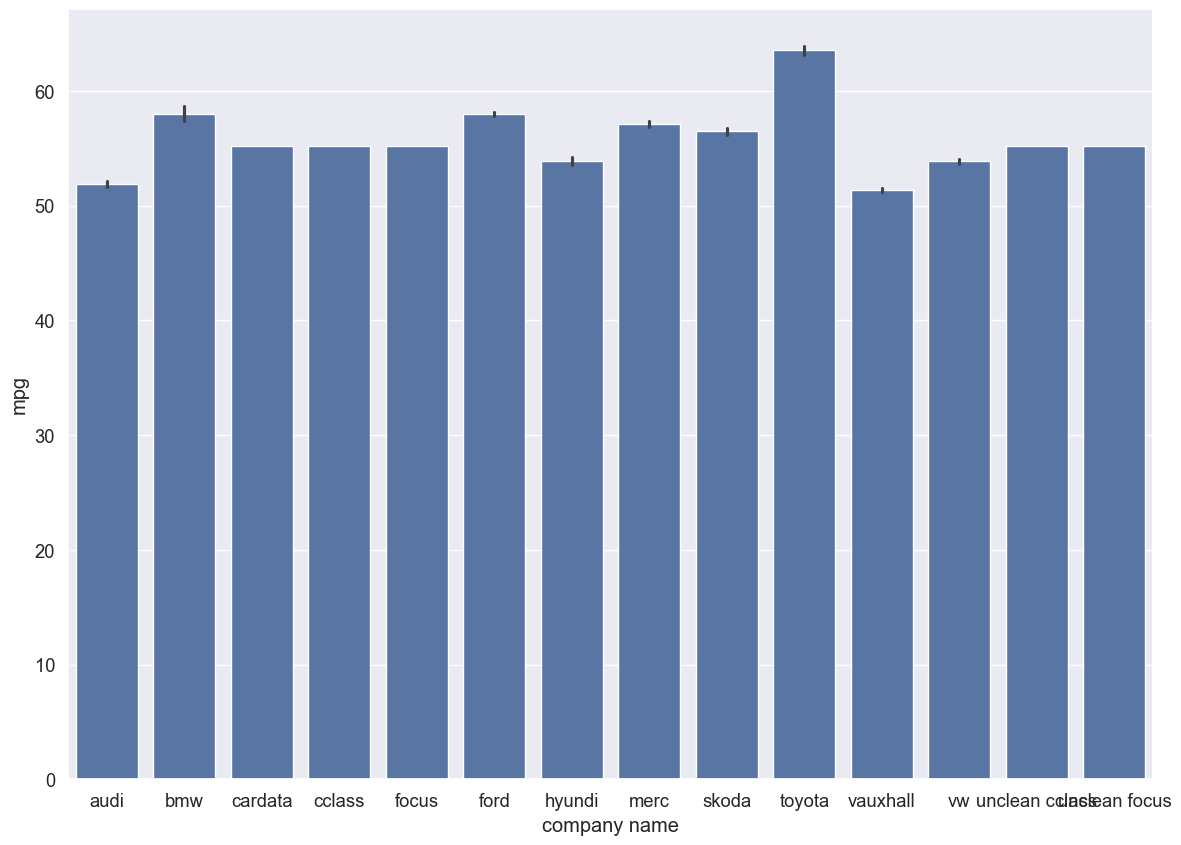

In [69]:
sns.barplot(data=df, x='company name', y='mpg')

<Axes: xlabel='model', ylabel='mpg'>

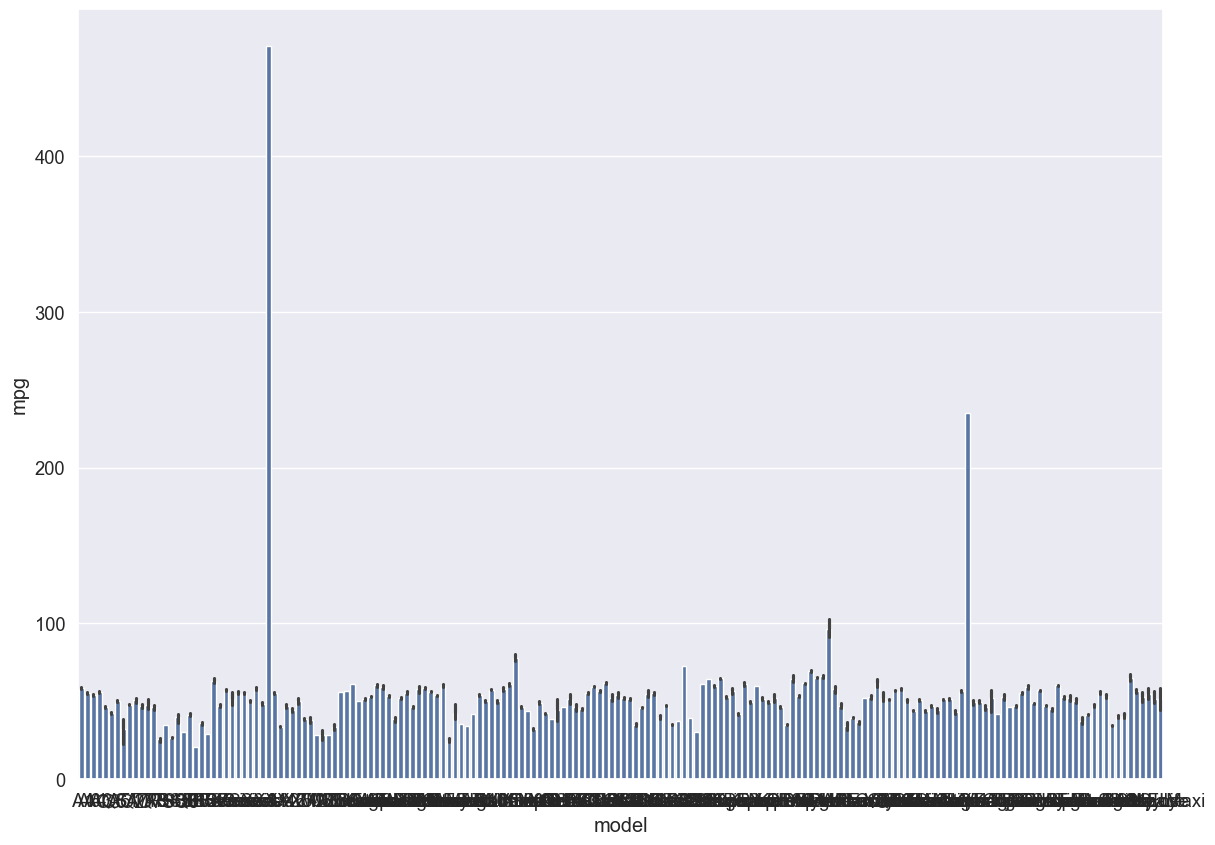

In [70]:
sns.barplot(data=df, x='model', y='mpg')


<Axes: xlabel='model', ylabel='mpg'>

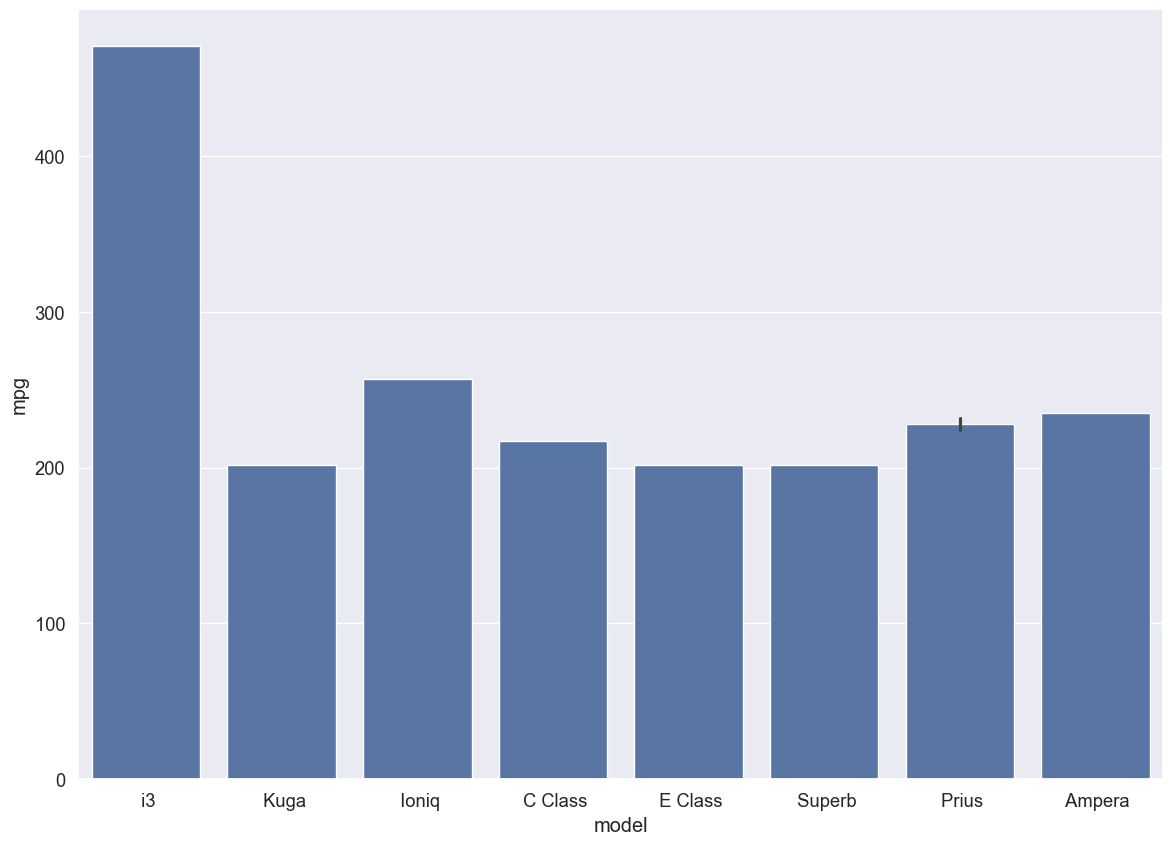

In [71]:
# The most efficient car is 'i3' which is Hybrid car from BMW.
sns.barplot(data=df[df['mpg']>200], x='model', y='mpg')

In [72]:
df[df['model']=='i3'].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)


<Axes: xlabel='transmission', ylabel='count'>

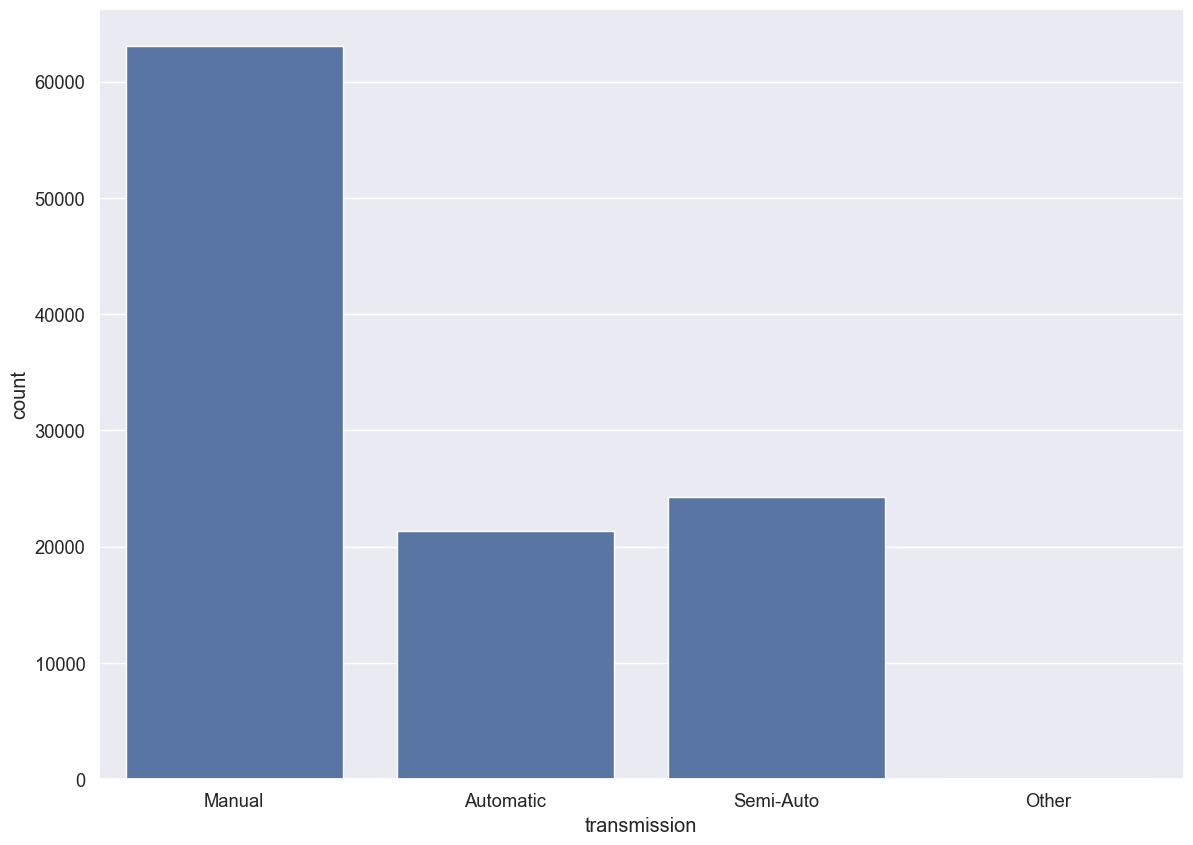

In [73]:
sns.countplot(data=df, x='transmission')

In [74]:
df[df['transmission']== 'Other']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company name,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,tax(£)
25565,C Class,2012,11995.0,Other,44644.0,Diesel,119.909636,55.166825,3.000000,cclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53807,Ioniq,2017,12495.0,Other,27779.0,Hybrid,119.909636,78.500000,1.600000,hyundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
53829,Tucson,2017,16995.0,Other,25915.0,Petrol,119.909636,39.800000,1.600000,hyundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0
63578,GLA Class,2016,18700.0,Other,30895.0,Other,125.000000,56.500000,0.000000,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66690,SLK,2015,12995.0,Other,39000.0,Diesel,150.000000,56.500000,2.100000,merc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73173,Scala,2019,15999.0,Other,3500.0,Petrol,145.000000,47.100000,1.000000,skoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75772,Yaris,2015,12795.0,Other,16733.0,Hybrid,0.000000,78.000000,1.500000,toyota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86756,Mokka,2019,19995.0,Other,1450.0,Diesel,145.000000,57.700000,1.500000,vauxhall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87371,Mokka,2019,13499.0,Other,3000.0,Petrol,145.000000,44.800000,1.400000,vauxhall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87474,Mokka,2019,22499.0,Other,4500.0,Petrol,145.000000,42.200000,1.500000,vauxhall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preprocessing

In [75]:
# renaming transmission values

transmition_map = {'Other':0, 'Manual':1, 'Semi-Auto':2, 'Automatic':3}

df['transmission'] = df['transmission'].map(transmition_map)
df.transmission.unique()

array([ 1.,  3.,  2., nan,  0.])

In [76]:
df = pd.get_dummies(df, columns=['model','transmission', 'fuelType','company name'])
df.head()

,year,price,mileage,tax,mpg,engineSize,Car_Name,Year,Selling_Price,Present_Price,...,company name_focus,company name_ford,company name_hyundi,company name_merc,company name_skoda,company name_toyota,company name_unclean cclass,company name_unclean focus,company name_vauxhall,company name_vw
0,2017,12500.0,15735.0,150.0,55.4,1.4,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,2016,16500.0,36203.0,20.0,64.2,2.0,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,2016,11000.0,29946.0,30.0,55.4,1.4,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,2017,16800.0,25952.0,145.0,67.3,2.0,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,2019,17300.0,1998.0,145.0,49.6,1.0,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols=['year','price','mileage','tax','mpg', 'engineSize']
df[cols]=scaler.fit_transform(df[cols])
df.head()

,year,price,mileage,tax,mpg,engineSize,Car_Name,Year,Selling_Price,Present_Price,...,company name_focus,company name_ford,company name_hyundi,company name_merc,company name_skoda,company name_toyota,company name_unclean cclass,company name_unclean focus,company name_vauxhall,company name_vw
0,-0.121840,-0.508990,-0.310439,0.443421,-0.017508,-0.417791,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1,-0.661257,0.057594,0.971925,-1.407974,0.599191,0.821559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,-0.661257,-0.721459,0.579911,-1.265559,-0.017508,-0.417791,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,-0.121840,0.100088,0.329678,0.372213,0.816437,0.821559,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,0.956993,0.170911,-1.171091,0.372213,-0.423968,-1.244024,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [78]:
from sklearn.model_selection import train_test_split

x = df.drop(['price', 'Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], axis=1)
y = df[['price']]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)

In [80]:
x_train.columns

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'Year', 'Selling_Price',
       'Present_Price', 'Kms_Driven', 'Owner',
       ...
       'company name_focus', 'company name_ford', 'company name_hyundi',
       'company name_merc', 'company name_skoda', 'company name_toyota',
       'company name_unclean cclass', 'company name_unclean focus',
       'company name_vauxhall', 'company name_vw'],
      dtype='object', length=214)

# Modeling 

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score

In [82]:
models = {'XGB' : XGBRegressor()} #could add more models

In [83]:
for name, model in models.items() :
    print(name)
    print('-'*10)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    ## score 
    print('Train Score', r2_score(y_train, model.predict(x_train)))
    print('Validation Score', r2_score(y_test, y_pred))
    print('='*50)

XGB
----------
Train Score 0.9516855478286743
Validation Score 0.9477148652076721


# Real world example

We will edit a row in x_test with data about a new car seen from used cars NI. This is a 2009 Toyota Corolla 

In [84]:
car = x_test.iloc[0]

In [85]:
toyota_on_market = x_test.iloc[0]
toyota_on_market['model_ I10'] = False
toyota_on_market['company name_hyundi'] = False;


C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\1820861158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_on_market['model_ I10'] = False
C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\1820861158.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_on_market['company name_hyundi'] = False;


In [86]:
toyota_on_market['company name_toyota'] = True
toyota_on_market['model_ Corolla'] = True
toyota_on_market['year'] = 2009
toyota_on_market['mileage'] = 60000
toyota_on_market['tax'] = 130.92
toyota_on_market['mpg'] = 55.8
toyota_on_market['engineSize'] = 1.6;


C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\3333039996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_on_market['company name_toyota'] = True
C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\3333039996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_on_market['model_ Corolla'] = True
C:\Users\thoma\AppData\Local\Temp\ipykernel_2020\3333039996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyota_on_mark

In [87]:
toyota_on_market.to_string()

'year                              2009\nmileage                          60000\ntax                             130.92\nmpg                               55.8\nengineSize                         1.6\nYear                               NaN\nSelling_Price                      NaN\nPresent_Price                      NaN\nKms_Driven                         NaN\nOwner                              NaN\ntax(£)                           145.0\nmodel_ 1 Series                  False\nmodel_ 2 Series                  False\nmodel_ 3 Series                  False\nmodel_ 4 Series                  False\nmodel_ 5 Series                  False\nmodel_ 6 Series                  False\nmodel_ 7 Series                  False\nmodel_ A Class                   False\nmodel_ A1                        False\nmodel_ A3                        False\nmodel_ A4                        False\nmodel_ A5                        False\nmodel_ A6                        False\nmodel_ A7                        False\

In [88]:
toyota_on_market_predicted_price = model.predict([toyota_on_market])

In [89]:
toyota_on_market_predicted_price[0]

np.float32(0.16564627)

Thus the predicted price of the toyota on the market is £3,226.61!